In [ ]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"
ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif torch.backends.mps.is_available() and ALLOW_MPS:
    DEVICE = "mps"
    
print(f"Using device {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")

mode_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(mode_file, DEVICE)

### Text to Image params

In [9]:
prompt = "This image shows the dog. Include a specs for this dog. And include wings for the dog."
uncond_prompt = "Do not create any hat on dog. "
do_cfg = True
cfg_scale = 7

### Image to Image params

100%|██████████| 45/45 [08:23<00:00, 11.18s/it]


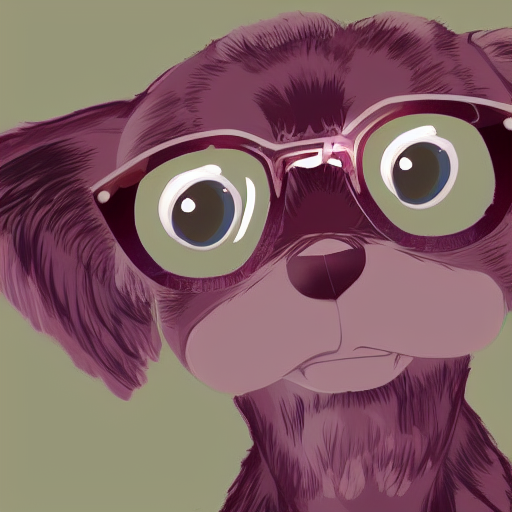

In [10]:
input_image = None
image_path = "../images/dog.jpg" 
input_image = Image.open(image_path)
strength = 0.9

sampler = "ddpm"
num_inference_steps = 50
seed = 42
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    models=models,
    seed=seed,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer
    
)

Image.fromarray(output_image)